In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import re, os
os.makedirs('plots', exist_ok=True)

In [2]:
# PARAMS
NAME = 'IL.7FEB20.BM2_Run1'

D = {  # Dictionary for concentrations
    '0-5_Epo':0.5, 
    '1unit_Epo':1,
    '0-25_Epo':0.25,
    '0-0625_Epo':0.0625,
    '0-125_Epo':0.125,
    'No_Epo':0,
    
    'point5U_Epo':0.5, 
    '1U_Epo':1,
    'point25U_Epo':0.25,
    'point0625U_Epo':0.0625,
    'point125U_Epo':0.125,
    'NoEpo':0,
    
    'point5unitsEpo':0.5, 
    '1unitEpo':1,
    'point25unitsEpo':0.25,
    'point0625unitsEpo':0.0625,
    'point125unitsEpo':0.125,
    'NoEpo':0,
    
    'point5Epo':0.5, 
    '1Epo':1,
    'point25Epo':0.25,
    'point0625Epo':0.0625,
    'point125Epo':0.125,
    'NoEpo':0
    }

## COUNT

In [4]:
# COUNT
C = pd.read_csv('COUNT.csv')
C['PLATE'] =  C['NAME'].str.split('.').str[0]
C.head(8)

,Unnamed: 0,NAME,COUNT,PLATE
0,0,il17f_point1_3_FIRST_SCAN-Stitched.0,1,il17f_point1_3_FIRST_SCAN-Stitched
1,1,il17f_point1_3_FIRST_SCAN-Stitched.1,1,il17f_point1_3_FIRST_SCAN-Stitched
2,2,il17f_point1_3_FIRST_SCAN-Stitched.2,0,il17f_point1_3_FIRST_SCAN-Stitched
3,3,il17f_point1_3_FIRST_SCAN-Stitched.3,0,il17f_point1_3_FIRST_SCAN-Stitched
4,4,No_epo_2_FIRST_SCAN-Stitched.0,0,No_epo_2_FIRST_SCAN-Stitched
5,5,No_epo_2_FIRST_SCAN-Stitched.1,0,No_epo_2_FIRST_SCAN-Stitched
6,6,No_epo_2_FIRST_SCAN-Stitched.2,1,No_epo_2_FIRST_SCAN-Stitched
7,7,No_epo_2_FIRST_SCAN-Stitched.3,0,No_epo_2_FIRST_SCAN-Stitched


In [5]:
# merge scans
optional_strings = ['_Bottom-Stitching', '_Top-Stitching', '_Left-Stitching', '_Right-Stitching']
pattern = '|'.join(re.escape(s) + '.*' for s in optional_strings)
C['PLATE'] = C['PLATE'].str.replace(pattern, '', regex=True)
pattern

'_Bottom\\-Stitching.*|_Top\\-Stitching.*|_Left\\-Stitching.*|_Right\\-Stitching.*'

In [6]:
# merge plates
count = C.groupby('PLATE')['COUNT'].sum().reset_index()
count = count[count['PLATE'] != 'point25unitsEpo_3-Stitching-15'] # attention, outlier removed, value is 11
count.to_csv(NAME+'.count.csv')
count.sort_values('PLATE')

,PLATE,COUNT
0,Epo_point1_1_FIRST_SCAN-Stitched,3
1,Epo_point1_1_SECOND_SCAN-Stitched,6
2,Epo_point1_2_FIRST_SCAN-Stitched,2
3,Epo_point1_2_SECOND_SCAN-Stitched,1
4,Epo_point1_3_FIRST_SCAN-Stitched,4
5,Epo_point1_3_SECOND_SCAN-Stitched,4
6,Epo_point5_1_FIRST_SCAN-Stitched,32
7,Epo_point5_1_SECOND_SCAN-Stitched,25
8,Epo_point5_2_FIRST_SCAN-Stitched,24
9,Epo_point5_2_SECOND_SCAN-Stitched,20


In [7]:
data = pd.read_csv("IL.7FEB20.BM2_Run1.count.formatted.csv") # mannually formatted
data

,PLATE,Epo_Level,COUNT,Type
0,Epo_point1_1_FIRST_SCAN-Stitched,0.1,3,EPO
1,Epo_point1_1_SECOND_SCAN-Stitched,0.1,6,EPO
2,Epo_point1_2_FIRST_SCAN-Stitched,0.1,2,EPO
3,Epo_point1_2_SECOND_SCAN-Stitched,0.1,1,EPO
4,Epo_point1_3_FIRST_SCAN-Stitched,0.1,4,EPO
5,Epo_point1_3_SECOND_SCAN-Stitched,0.1,4,EPO
6,Epo_point5_1_FIRST_SCAN-Stitched,0.5,32,EPO
7,Epo_point5_1_SECOND_SCAN-Stitched,0.5,25,EPO
8,Epo_point5_2_FIRST_SCAN-Stitched,0.5,24,EPO
9,Epo_point5_2_SECOND_SCAN-Stitched,0.5,20,EPO


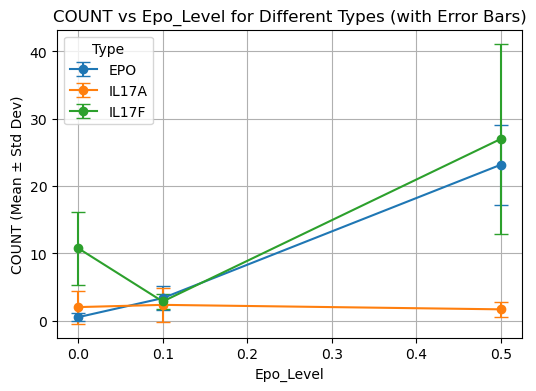

In [12]:
df = data

# Group by both 'Type' and 'Epo_Level', and calculate mean and std of 'COUNT'
grouped = df.groupby(['Type', 'Epo_Level']).agg(
    mean_count=('COUNT', 'mean'),
    std_count=('COUNT', 'std')  # standard deviation
).reset_index()

# Plotting
plt.figure(figsize=(6, 4))

# Plot for each Type with error bars
for type_name in grouped['Type'].unique():
    group = grouped[grouped['Type'] == type_name]
    
    # Plot with error bars (std deviation)
    plt.errorbar(group['Epo_Level'], group['mean_count'], yerr=group['std_count'], 
                 label=type_name, marker='o', linestyle='-', capsize=5)

# Add labels, title, and legend
plt.xlabel('Epo_Level')
plt.ylabel('COUNT (Mean ± Std Dev)')
plt.title('COUNT vs Epo_Level for Different Types (with Error Bars)')
plt.legend(title='Type')
plt.grid(True)

# Show the plot
plt.savefig(NAME + ".pdf")

In [9]:
grouped

,Type,Epo_Level,mean_count,std_count
0,EPO,0.0,0.500000,0.577350
1,EPO,0.1,3.333333,1.751190
2,EPO,0.5,23.166667,5.946988
3,IL17A,0.0,2.000000,2.449490
4,IL17A,0.1,2.333333,2.516611
5,IL17A,0.5,1.666667,1.154701
6,IL17F,0.0,10.750000,5.439056
7,IL17F,0.1,2.833333,1.169045
8,IL17F,0.5,27.000000,14.165686


In [ ]:
def find_concentration(text):
    pattern = r'.+Epo'  # Matches words
    if re.search(pattern, text):
        return (re.search(pattern, text).group())
    else:
        print(text)
        sys.exit("pattern not found")
 
concentrations = [find_concentration(x) for x in C['NAME']]
options = list(set(concentrations))
print(options)

In [ ]:
D2 = {} # concentration to count
for i, row in count.iterrows():
    name = row['PLATE'] # 0625_Epo_1_FIRST_SCAN_Stitched
    count = row['COUNT']
    key = find_concentration(name) # 0625_Epo
    concentration = D[key] # 0.0625
    #print(name, count, key, concentration)
    if concentration in D2:
        D2[concentration].append(count)
    else:
        D2[concentration] = [count]
        
D2 = dict(sorted(D2.items()))
D2

In [ ]:
D2

In [ ]:
def curve_with_errbars (data):
    # Calculate means and standard deviations
    #     data = {
    #     0: [0, 4, 0, 1],
    #     0.0625: [10, 11, 8, 10],
    #     0.125: [12, 11, 12, 10],
    #     0.25: [16, 9, 10, 8],
    #     0.5: [14, 14, 16, 10],
    #     1: [13, 10, 7, 16]
    #     }
    df = pd.DataFrame([(key, val) for key, values in data.items() for val in values], columns=['x', 'y'])
    #print(df)

    x = list(data.keys())
    y = [np.mean(data[key]) for key in x]
    yerr = [np.std(data[key]) for key in x]
    
    jitter = 0.01  # Adjust the amount of jitter as needed
    df['x_jittered'] = df['x'] + np.random.uniform(-jitter, jitter, size=len(df))



    # Plotting the curve with error bars
    plt.errorbar(df['x'], df['y'], fmt='o',color='darkgray', capsize=5,  label='Dots')
    plt.errorbar(x, y, yerr=yerr, fmt='-',color='gray', capsize=5, label='Curve')

    plt.xlabel('Epo Concentration')
    plt.ylabel('Plate Count')
    plt.title('Curve with Standard Deviation Error Bars'+'\n'+NAME)
    plt.grid(True)
    
curve_with_errbars(D2)
plt.savefig('plots/Count-Epo-Curve.' + NAME + '.pdf')

In [ ]:
# get manual count

In [ ]:
m_count = pd.read_csv('fl200807.mcount.csv')
m_count.columns = ['Epo Dose', 'Total Plate Count', 'STD']
m_count

In [ ]:
x = list(D2.keys())
y = [np.median(D2[key]) for key in x]
c_count = pd.DataFrame({'Epo':x, 'Count':y})
c_count

In [ ]:
# Create a scatter plot
def scatterplot(x,y, xname, yname):   
    correlation = np.corrcoef(x, y)[0, 1]
    plt.scatter(x, y)
    plt.xlabel(xname)
    plt.ylabel(yname)
    plt.title('Pearson Correlation ({:.2f})'.format(correlation))

# Calculate the correlation
scatterplot(m_count['Total Plate Count'], c_count['Count'], 'mcount', 'ccount')
plt.savefig('plots/corr-ccount-mcount.' + NAME +'.pdf')

## AREA


In [ ]:
A = pd.read_csv('areas.csv', index_col=0)
A.head()

In [ ]:
A.columns

In [ ]:
# merge scans
pattern = '|'.join(re.escape(s) + '.*' for s in optional_strings)
C['PLATE'] = C['PLATE'].str.replace(pattern, '', regex=True)
pattern

In [ ]:
D3 = {}

for i in range(len(A.columns)):
    areas = list(A.iloc[:,i].dropna())
    name = A.columns[i]
    key = find_concentration(name)
    concentration = D[key]
    #print(i, name, concentration, areas)
    if concentration in D3:
        D3[concentration] = D3[concentration] + areas
    else:
        D3[concentration] = areas
    

D3 = dict(sorted(D3.items()))      
print(D3)

In [ ]:
plt.boxplot(D3.values(), labels=D3.keys())
plt.xlabel('Epo Concentration')
plt.ylabel('Colony Size')
plt.ylim(0, 8000)
plt.savefig('plots/Size-Epo.' + NAME + '.pdf')

In [ ]:
L = [v for v in D3.values()]
def flatten(nested_list):
    flat_list = []
    for l in nested_list:
        flat_list += l
    return flat_list
L = flatten(L)

In [ ]:
plt.hist(L, 100)
plt.xlim(0, 8000)
plt.savefig('plots/Size-Histogram.pdf')

In [ ]:
pwd